# Week 11: Big Data and Distributed Computing
_Dashing Distributed Data_

## Bigger data? Why?

**NBC Universal** stores hundreds of terabytes of media for international cable TV. To save on costs, it takes the media offline when it is unlikely to be used soon. The company uses Spark MLlib Support Vector Machines to predict which files will not be used.

The **Toyota Customer 360 Insights Platform and Social Media Intelligence Center** is powered by Spark MLlib. Toyota uses MLlib to categorize and prioritize social media interactions in real-time.

**Radius Intelligence** uses Spark MLlib to process billions of data points from customers and external data sources, including 25 million canonical businesses and hundreds of millions of business listings from various sources.
ING uses Spark in its data analytics pipeline for anomaly detection. The company’s machine learning pipeline uses Spark decision tree ensembles and k-means clustering.

## Table of Contents
- Distributed Systems Intro
- Working with Distributed Systems
  - MapReduce
  - GFS
- Spark (and PySpark)
- Improving Upon a Previous Workshop
- Extra: Data Streaming

## Distributed Systems Intro
#### What is it?
A distributed system is just a computer system whose components are located on different networked computers that interact with each other.

How do we leverage this for parallel computing?



## Working with Distributed Systems - MapReduce 

### What is MapReduce?
Proposed by Google in 2004, MapReduce is a common (and pretty famous!) framework for large data. The actual algorithm itself is pretty simple and flexible. It is relatively easy for newcomers to parallel/distributed systems to learn as it hides many details of parallelization, fault-tolerance, etc... The model is actually two separate functions: `Map` and `Reduce`

## `Map`

This function runs first. It takes an input pair and produces a set of intermediate (key, value) pairs. We then group together these intermediate values based on the key and pass them to `Reduce`.

## `Reduce`
This function runs after `Map`. It takes an intermediate key and a set of values for the key. The function then merges the set of values together to form a (possibly smaller) set of values.

Each invocation of `Reduce` produces 0 or 1 output value.


### An easy example, counting the number of occurrences of each word in a document



```
Map(String key, String value):
    // key: document name
    // value: document contents
    
    for each word w in value:
        EmitIntermediate(w, "1");


Reduce(String key, Iterator values):
    // key: a word
    // values: a list of counts
    
    int result = 0;

    for each v in values:
        result += ParseInt(v);

    Emit(AsString(result));
```



## A more realistic application
Say you're a software engineer working for a large social media website. A new feature your bosses want to implement is a mutual friend list, showing the friends you and another person have in common. As input, for every user, you are given a list of their friends, looking something like the below:

```
Evan -> Joey, Michael
Michael -> Charles, Evan, Joey
Charles -> Michael
Joey -> Evan, Michael
```
A naive solution to this problem could be the following:

Loop through every person and compare them with every other person to see how many friends they have in common. A pseudocode for this is below:

```
For every user:
    For every friend in user's friends:
        (user, friend).mutuals = empty list
        
        For every possible_mutual in friend's friends:
            if possible_mutual is a friend of user:
                add possible_mutual to mutuals
```

But this takes a lot of time to run right? O(n^3) time if you do the runtime analysis. And if the company you're working for has 2.7 billion users like Facebook, this would take far too long to run.

### Using MapReduce and Parallel Programming


Remember the `Map` function outputs a key-value pair. Let's define the key as a pair of (user, friend) and the value as a list of the user's friends.

From our example above, for Evan we'd have:

```
(Evan, Joey) -> [Joey, Michael]
(Evan, Michael) -> [Joey, Michael]
```

We can do the `Map` step in parallel for every one of our users to get one big list of (user, friend). Note that we will be keeping alphabetical order in the pairs so when we run the `Map` step for Joey, the pair will look like this:

```
(Evan, Joey) -> [Evan, Michael]
(Joey, Michael) -> [Evan, Michael]
```

Before we send all these key-value pairs to the Reducers, we group them by their keys like so:

```
(Evan, Joey) -> [Joey, Michael], [Evan, Michael]
```

Then, we can define our `Reduce` function to take the intersection of the lists of friends and output this.

```
(Evan, Joey) -> [Michael]
```

Now, when Evan or Joey visit each other's profiles, they'll see that they have a mutual friend Michael.

### What's the runtime?

We're doing the Map, grouping, and Reduce steps in parallel! So this is effectively O(n) time!

## Where was MapReduce used?

Until 2014, MapReduce was used in a lot of problems including but not limited to

* Clustering problems for Google News
* Large-Scale Machine Learning
* Data extraction to produce reports on popular search queries
* Large-Scale graph computations

[Google Paper](https://static.googleusercontent.com/media/research.google.com/en//archive/mapreduce-osdi04.pdf)

### What is MapReduce built on? Google File System

A file system is just a portion of your operating system whose sole purpose is to provide long-term storage. But a lot of data is too big to fit on a single machine!

This is where Distributed File Systems (DFS) come into play. They offer you the ability to store data across a large number of servers.

One implementation of this is the *Google File System (GFS)* 

Proposed by Google a year before MapReduce, GFS divides large files into smaller, more manageable chunks of 64 MB and stores these chunks on multiple nodes. We're defining large here as unable to store on a single storage drive.

A catch here is that these nodes consist of "cheap" computers, meaning they have a pretty high failure rate (lost data!).

You'll notice in the graphic below that a lot of the chunks of files are replicated across chunk servers.

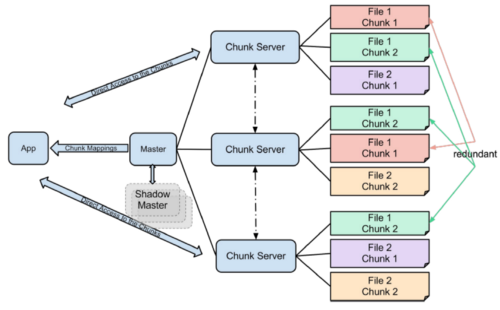

[Google Paper](https://research.google.com/archive/gfs-sosp2003.pdf)

## Spark (and PySpark)

Apache Spark is a data processing framework that can quickly perform processing tasks on very large data sets, and can also distribute data processing tasks across multiple computers, either on its own or in tandem with other distributed computing tools. 

PySpark is a python implementation of Spark and can be used with dataframes, machine learning algorithms, and RDD's. 

![Spark Diagram](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/10/spark-application.png)

![Spark Diagram 2](https://miro.medium.com/max/894/0*ZfyTJY1Whd5AMpe9.png)


Spark is very similar to Map Reduce except Spark processes data in-memory, while Hadoop MapReduce has to read from and write to a disk. As a result, the speed of processing differs significantly – Spark may be up to 100 times faster. 


In the pictures above the a driver program runs the main function of the application. The driver program works with the cluster manager to manage jobs. The jobs are completed by the worker nodes. If you increase workers nodes, the program speed increase. 

Cheat Sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PySpark_Cheat_Sheet_Python.pdf

#RDD's (Resilient Distributed Datasets)

RDD are the building blocks of Spark. In RDD's, there are two types of operations: transformations, which define a new dataset based on previous ones but changes the data, and actions, a function that doesn't change the data but gives an output. 




In [ ]:
#@title Setup code for Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"
import findspark
findspark.init()

from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

```
#Two common ways of creating a RDD
sc.parallelize(array)                  #Create RDD of elements of array (or list) created among different nodes and not just one
sc.textFile("path/to/file")            #Create RDD of lines from file 
```

The difference is with the datasets - files (for textFile) while a local collection (for parallelize). Either does the same things under the covers, i.e. they both build a description of how to access the data that are going to be processed using transformations and an action.

The main difference is therefore the source of the data.

#Transformations:

- Map: 
Transform your data row-wise and 1:1 with a function
v_RDD.map(lambda x: math.log(x, 2))  # transform value into its log2
kv_RDD.map(lambda row: (row[0], float(row[1]-32)*5/9))  # convert temperature to celsius

- FlatMap: Similar but “flattens” the results, i.e. loses one dimension. Think unlist() in R. The resulting value y in the following example now has five elements after flatMap(), instead of two elements after map().


- ReduceByKey: Reduces an RDD but keeps it as an RDD (unlike ‘reduce’)
kv_RDD.reduceByKey(max)  # create RDD with (year, maxTemperature)
kv_RDD.reduceByKey(lambda x, y: x+y)  # sums up temperatures by year


- Filter: Select only interesting entries from your RDD




#Actions
- Collect: Dump all elements, i.e. converts the RDD to a Python list
- Count: Returns the number of elements in an RDD
- CountByValue: Outputs a dictionary of (key, n), i.e. a count, by unique value. This is similar to doing map(lambda x: (x, 1)).reduceByKey(lambda x,y: x+y).collect(). Note that you need the .items() method on your dictionary to convert it into a list of key/value-tuples.
take, top: Sample a few values
- Reduce: Aggregate all values for a given key value

In [ ]:
%%writefile example.txt
Hello this is a text file
This is the second line of the text file
This is the third line of the text file

Overwriting example.txt


In [ ]:
import os, shutil


text_file = sc.textFile('example.txt')
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)

# remove the result folder if it already exists
folder_to_write_to = "result"
if os.path.exists(folder_to_write_to):
    shutil.rmtree(folder_to_write_to)

# save result of spark operations to result folder
counts.saveAsTextFile(folder_to_write_to)

In [ ]:
from pathlib import Path


# print out the file contents of the results
for filename in os.listdir(folder_to_write_to):
    # don't process any hidden files
    if filename.startswith("."):
        continue

    # open and print out file contents
    print(f"filename = {filename}")
    # directory separator operator "/"
    path = Path(folder_to_write_to) / filename
    with open(path, "r") as f:
        contents = f.readlines()
    print("".join(contents))

    print("===================================")

filename = part-00001
('a', 1)
('text', 3)
('file', 3)
('This', 2)
('the', 4)
('second', 1)

filename = _SUCCESS

filename = part-00000
('Hello', 1)
('this', 1)
('is', 3)
('line', 2)
('of', 2)
('third', 1)



In the example above, we use a few transformations to build a dataset of (String, Int) pairs called counts and then save it to a file.


Other examples: https://spark.apache.org/examples.html 


Resources to learn more: 

https://data-flair.training/blogs/spark-rdd-operations-transformations-actions/

https://www.datacamp.com/community/tutorials/apache-spark-python

On top of Spark’s RDD API, high level APIs are provided, e.g. DataFrame API and Machine Learning API. These high level APIs provide a concise way to conduct certain data operations.

## Improving Upon a Previous Workshop (Shaw)

Reference: [link](https://colab.research.google.com/github/asifahmed90/pyspark-ML-in-Colab/blob/master/PySpark_Regression_Analysis.ipynb)

In [ ]:
#@title MNIST Data Prep

train_file = "sample_data/mnist_train_small.csv"
test_file = "sample_data/mnist_test.csv"

import csv
from collections import defaultdict
import json
class reader:
    def __init__(self,lim=100):
        self.train,self.test = self._get_data(lim)
        # self._print_list(self.train[0])
        with open("train_data.json",'w') as fout:
            json.dump(self.train,fout)
        with open("test_data.json",'w') as fout:
            json.dump(self.test,fout)
    
    @staticmethod
    def _print_list(print_list):
        for digit in print_list:
            for row in range(28):
                for column in range(28):
                    print(digit[28*row+column],end="")
                print()
            print()

    @staticmethod
    def _get_data(lim=100):
        train = defaultdict(list)
        test = defaultdict(list)
        with open(train_file,'r') as fin:
            mnist_reader = csv.reader(fin)
            for digit in mnist_reader:
                cur_elem=[]
                for element in range(1,len(digit)):
                    if int(digit[element]) > lim:
                        cur_elem.append(1)
                    else:
                        cur_elem.append(0)
                train[int(digit[0])].append(cur_elem)

        with open(test_file,'r') as fin:
            mnist_reader = csv.reader(fin)
            for digit in mnist_reader:
                cur_elem=[]
                for element in range(1,len(digit)):
                    if int(digit[element]) > lim:
                        cur_elem.append(1)
                    else:
                        cur_elem.append(0)
                test[int(digit[0])].append(cur_elem)
        return train, test


reader(45)

In [ ]:
#@title Naive Bayes MNIST using numpy (from ADSA Workshop Fall 2018)

import json
import math
import time

from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt


class NB:

    def __init__(self, train_path, test_path, k_factor=0.1):
        # Intitialize all required variables
        self.corr = 0
        self.wrong = 0
        self.probabilities = {k: np.zeros(28 * 28) for k in range(10)}
        self.priors = []
        self.conf_matrix = [[0 for i in range(10)] for j in range(10)]

        # Load all data from JSON
        start = time.time()
        with open(train_path, 'r') as fin:
            self.train_data = json.load(fin)
            self.train_data = {int(k): v for k, v in self.train_data.items()}
        with open(test_path, 'r') as fin:
            self.test_data = json.load(fin)
            self.test_data = {int(k): v for k, v in self.test_data.items()}
        print("Time taken to load the data : {}".format(time.time()-start))

        # Train the model by calculating the probabilities P(xi|y)
        start = time.time()
        self._calculate_probabilities(self.train_data, k_factor)
        print("Time taken to train: {}".format(time.time()-start))

        # Classify them by doing
        # argmax_over_y (ln prior + sum_over_all_x(ln(p(x|y))))
        start = time.time()
        self.classify(self.test_data)
        print("Time taken to classify full test data set is {}".format(
            time.time()-start))

        # Print confusion matrix and the heatmaps
        print(DataFrame(self.conf_matrix))
        print("Accuracy is {}".format((self.corr)/(self.corr+self.wrong)))
        self._print_heatmaps()

    def _calculate_probabilities(self, train_data, k):
        # Calculate total number of training datapoints
        total = sum(len(v) for v in train_data.values())

        # Calculate prior probabilities for all classes
        self.priors = [len(train_data[i]) / total for i in range(10)]

        # Loop over all digits
        for digit in range(10):
            digit_list = train_data[digit]
            # Loop over all samples of the current digit
            for cur_digit in digit_list:
                # Loop over all features of current sample and count frequency
                self.probabilities[digit] += cur_digit
            # Divide each element by the total number of samples
            # for this digit  + a normalization factor to get the probability
            self.probabilities[digit] = (self.probabilities[digit] + k) / (len(digit_list) + (2 * k))

    def _print_heatmaps(self):
        for digit in range(10):
            cur_p = np.asarray(self.probabilities[digit])
            cur_p = np.reshape(cur_p, (28, 28))
            plt.subplot(5, 2, digit+1)
            plt.imshow(cur_p, cmap='hot', interpolation='nearest')
            plt.title("Heatmap for the digit {}".format(digit))
        plt.show()

    def classify(self, data):
        # Loop through the dictionary with all test samples
        for key, value in data.items():
            # Loop through all samples for current class
            for digit in value:
                # Call helper classify function
                res = self._classify(digit)
                self.conf_matrix[int(key)][res] += 1
                if(int(key) == res):
                    self.corr += 1
                else:
                    self.wrong += 1

    def _classify(self, arr):
        max_val = float('-inf')
        # Get the arg value for a sdigit with current sample
        # and classfiy it as the max of all these values
        for digit in range(10):
            digit_probability = self.probabilities[digit]
            prob = self._get_cur_arg_value(
                cur_arr=arr, prob_arr=digit_probability, digit=digit)
            if prob > max_val:
                max_val = prob
                res = digit
        return res

    def _get_cur_arg_value(self, cur_arr, prob_arr, digit):
        # Loop through all samples and add the appropriate log of
        # the probability P(0|y) or P(1|y)
        prob = math.log(self.priors[digit])
        prob += sum(math.log((1 - prob_arr[i]) if (cur_arr[i] == 0) else prob_arr[i]) for i in range(28 * 28))
        # for i in range(28):
        #     for j in range(28):
        #         if(cur_arr[i*28+j] == 0):
        #             prob += math.log(1-prob_arr[i*28+j])
        #         else:
        #             prob += math.log(prob_arr[i*28+j])
        return prob

Time taken to load the data : 2.554827928543091
Time taken to train: 1.3718016147613525
Time taken to classify full test data set is 43.09340715408325
     0     1    2    3    4    5    6    7    8    9
0  888     0    1    5    1   39   24    1   21    0
1    0  1082   11    5    0    6    5    0   26    0
2   18    11  846   32   19    4   26   16   57    3
3    5    15   36  847    2   18    6   15   43   23
4    2     6    3    0  796    3   18    2   16  136
5   21    11    6  123   27  631   17    9   25   22
6   15    14   15    2   12   29  864    0    7    0
7    1    28   16    4   16    0    0  866   29   68
8   15    23   12   73   15   22   11    6  761   36
9   10    12    5    9   70    7    1   25   20  850
Accuracy is 0.8431


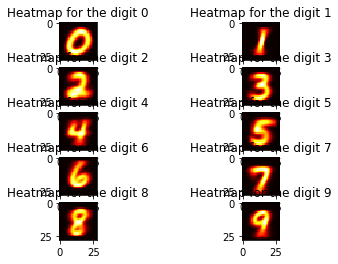

In [ ]:
NB("train_data.json", "test_data.json")

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"
import findspark
findspark.init()

from pyspark.sql import SparkSession

# title Naive Bayes MNIST using Spark

import json
import math
import time

from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint


class NB_Spark:

    def __init__(self, train_path, test_path, k_factor=0.1):
        # Intitialize all required variables
        self.spark = SparkSession.builder.master("local[*]")\
                        .config("spark.driver.memory", "15g") \
                        .appName("MNIST_Spark")\
                        .getOrCreate()
        self.sc = self.spark.sparkContext
        self.corr = 0
        self.wrong = 0
        self.probabilities = self.sc.parallelize([
                LabeledPoint(k, np.zeros(28 * 28))
                for k in range(10)
        ])
        self.priors = []
        self.conf_matrix = [[0 for i in range(10)] for j in range(10)]

        # Load all data from JSON
        start = time.time()
        with open(train_path, 'r') as fin:
            self.train_data = json.load(fin)
            self.train_data = self.sc.parallelize([
                LabeledPoint(int(k), point)
                for k, v in self.train_data.items()
                for point in v
            ])
        with open(test_path, 'r') as fin:
            self.test_data = json.load(fin)
            self.test_data = self.sc.parallelize([
                LabeledPoint(int(k), point)
                for k, v in self.test_data.items()
                for point in v
            ])
        print("Time taken to load the data : {}".format(time.time()-start))

        # Train the model by calculating the probabilities P(xi|y)
        start = time.time()
        self._calculate_probabilities(self.train_data, k_factor)
        print("Time taken to train: {}".format(time.time()-start))

        # Classify them by doing
        # argmax_over_y (ln prior + sum_over_all_x(ln(p(x|y))))
        # start = time.time()
        # self.classify(self.test_data)
        # print("Time taken to classify full test data set is {}".format(
        #     time.time()-start))

        # Print confusion matrix and the heatmaps
        # print(DataFrame(self.conf_matrix))
        # print("Accuracy is {}".format((self.corr)/(self.corr+self.wrong)))
        # self._print_heatmaps()

    def _calculate_probabilities(self, train_data, k):
        # Calculate total number of training datapoints
        total = train_data.count()

        # Calculate prior probabilities for all classes
        each_label_count = train_data.map(lambda x: (x.label, x.features)).countByKey()
        self.priors = { k : v/total for k,v in each_label_count.items() }

        # Loop over all digits
        self.probabilities = train_data.groupBy(lambda x: x.label)\
            .reduceByKey(lambda x, y: LabeledPoint(x.label, x.features + y.features))\
            .map(lambda x: (x[0], list(x[1])[0].features))\
            .map(lambda x: LabeledPoint(x[0],
                                        (np.array(list(x[1])) + k) / (each_label_count[x[0]] + 2 * k)))\
            .collect()

    def _print_heatmaps(self):
        for digit in range(10):
            cur_p = np.asarray(self.probabilities[digit])
            cur_p = np.reshape(cur_p, (28, 28))
            plt.subplot(5, 2, digit+1)
            plt.imshow(cur_p, cmap='hot', interpolation='nearest')
            plt.title("Heatmap for the digit {}".format(digit))
        plt.show()

    def classify(self, data):
        # Loop through the dictionary with all test samples
        for key, value in data.items():
            # Loop through all samples for current class
            for digit in value:
                # Call helper classify function
                res = self._classify(digit)
                self.conf_matrix[int(key)][res] += 1
                if(int(key) == res):
                    self.corr += 1
                else:
                    self.wrong += 1

    def _classify(self, arr):
        max_val = float('-inf')
        # Get the arg value for a sdigit with current sample
        # and classfiy it as the max of all these values
        for digit in range(10):
            digit_probability = self.probabilities[digit]
            prob = self._get_cur_arg_value(
                cur_arr=arr, prob_arr=digit_probability, digit=digit)
            if prob > max_val:
                max_val = prob
                res = digit
        return res

    def _get_cur_arg_value(self, cur_arr, prob_arr, digit):
        # Loop through all samples and add the appropriate log of
        # the probability P(0|y) or P(1|y)
        
        prob = math.log(self.priors[digit])
        prob += sum(math.log((1 - prob_arr[i]) if (cur_arr[i] == 0) else prob_arr[i]) for i in range(28 * 28))

        return prob


NB_Spark("train_data.json", "test_data.json")

Time taken to load the data : 5.701183795928955
Time taken to train: 2.8272812366485596


## More Resources for Spark
- Simple Regression Analysis Example Notebook: [link](https://colab.research.google.com/github/asifahmed90/pyspark-ML-in-Colab/blob/master/PySpark_Regression_Analysis.ipynb#scrollTo=9_Uz1NL4gHFx)
- A Neanderthal's Guide to Apache Spark: [link](https://towardsdatascience.com/a-neanderthals-guide-to-apache-spark-in-python-9ef1f156d427)

## Extra: Now What?
### Data Streaming
[Reference Link](https://www.cuelogic.com/blog/analyzing-data-streaming-using-spark-vs-kafka)
![Overall Architecture Image](https://23o0161033pm1289qo1hzrwi-wpengine.netdna-ssl.com/wp-content/uploads/2019/05/kafka-and-spark-streams-living-happily-ever-after.png)
![Stream Processing Image](https://23o0161033pm1289qo1hzrwi-wpengine.netdna-ssl.com/wp-content/uploads/2019/05/streaming-data-architecture-1024x510.png)

### Streaming Technologies
[Reference Link](https://medium.com/@chandanbaranwal/spark-streaming-vs-flink-vs-storm-vs-kafka-streams-vs-samza-choose-your-stream-processing-91ea3f04675b)
- Apache Hadoop
- Apache Storm
- Apache Flink
- Apache Spark Streaming
- Apache Kafka Streaming
- Apache Samza